In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import sqrt
import scipy

# ЗАДАНИЕ 1

<img src="1.png">

In [47]:
# tlfba2 обычная доза приема алкоголя (гр)
# tlfbh2 обычная доза употребления героина (мгр)
# cravin собственная оценка необходимой дозы героина
# sex пол: 1 – женский, 0 – мужской
data = pd.read_csv('var9.tsv', sep = '\t', decimal=',')
data.sort_values('tlfbh2').head(5)

,sex,age,curent_working,tlfba2,tlfbh2,cravin
241,0,25,0,10.1,0.60,1.0
268,0,21,0,12.6,5.80,3.0
170,0,22,0,8.2,11.10,3.5
42,0,31,1,5.7,17.33,1.4
100,1,25,0,0.9,22.20,5.0


<BarContainer object of 280 artists>

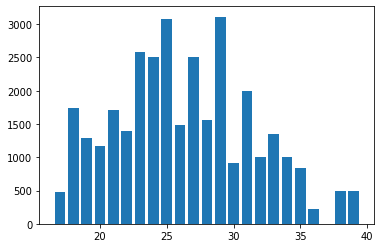

In [48]:
plt.bar(np.array(data['age']), np.array(data['tlfbh2']))

Можно немного проследить что сначала по возрасту возрастает, потом убывает, но не особо.

<BarContainer object of 280 artists>

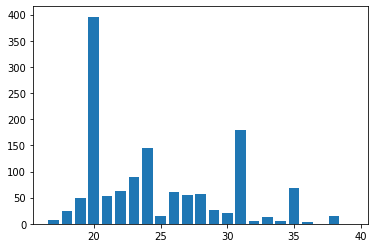

In [49]:
plt.bar(np.array(data['age']), np.array(data['tlfba2']))

То же самое, но дикий пик в 20 лет (как потом окажется, там просто выброс).

Выходит полная фигня. Копаем глубже

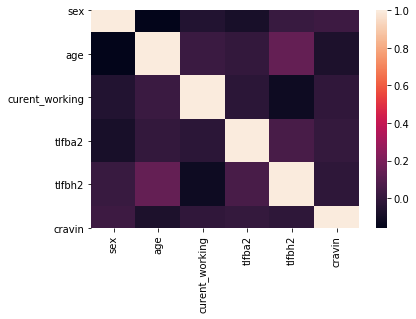

In [50]:
sns.heatmap(data.corr())

Корреляций особых, к сожалению нет (только отрецательные между работаешь/нет и героином), но давайте получше посмотрим на всякие зависимости:

### Мужчины/дэвушки

/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


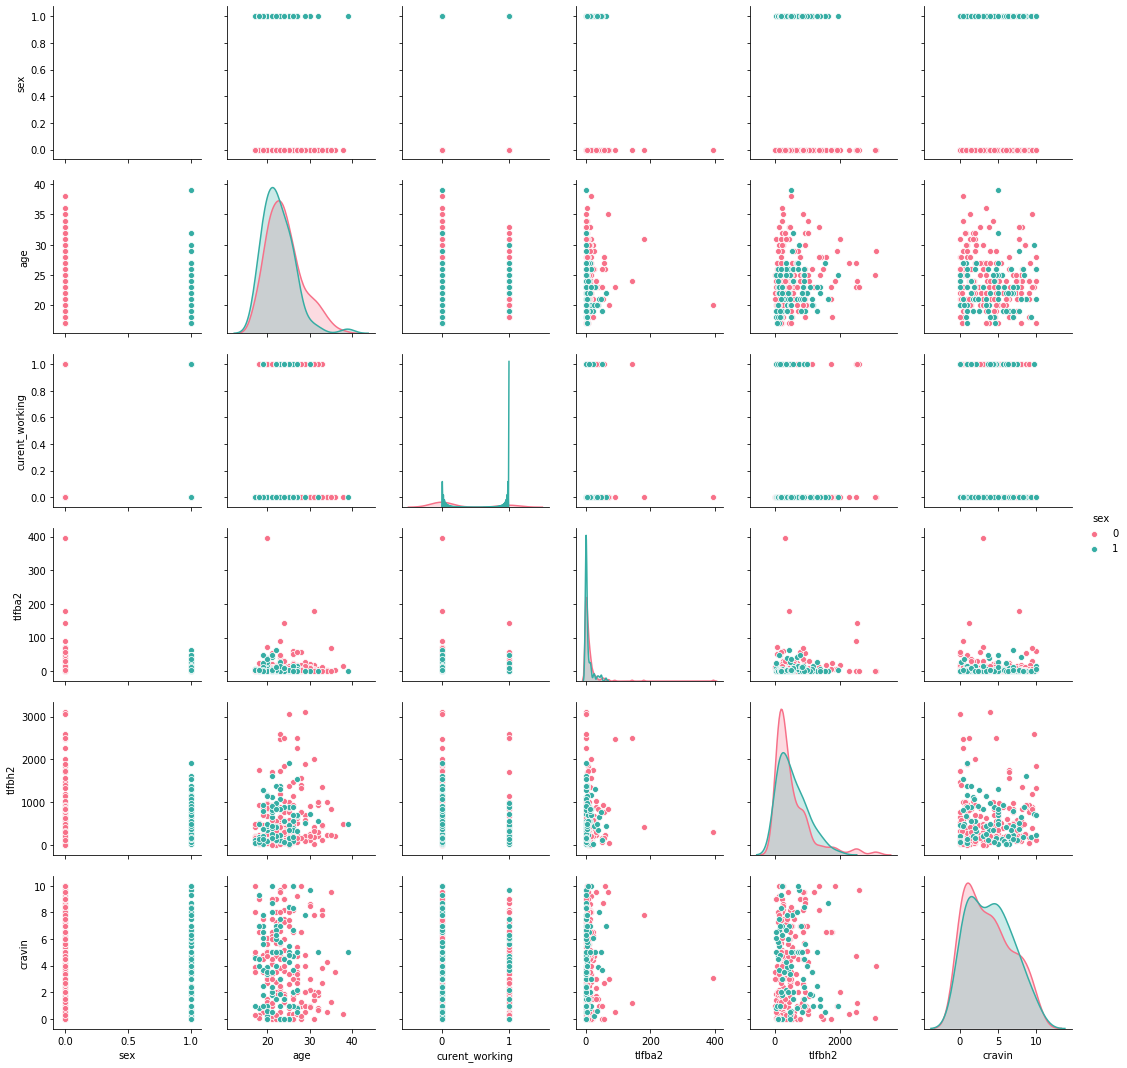

In [51]:
sns.pairplot(data, hue="sex", palette="husl");

Не густо. Почекаю описание, по полу разделю, будет лучше наверное.

In [53]:
data.groupby('sex').median()

,age,curent_working,tlfba2,tlfbh2,cravin
sex,,,,,
0,23,0,5.30,304.25,3.5
1,22,0,1.99,455.60,4.0


о, да, го посмотрим на боксплоты употребления алко и героина в зависимости от пола(хотя и так видно, что медиана намного больше у парней для алко и у девушек для героина)

P.S. (Это я просто примерно смотрел че да как, а сейчас буду конкретно исследовать)

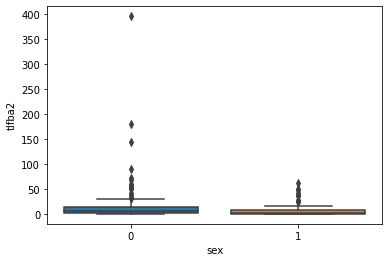

In [54]:
sns.boxplot(y=data.tlfba2, x=data.sex)

Алкоголик, который выжирает 400 грамм спирта, все портит. Он является выбросом и в прямом, и в переносном смысле.
Раздею на три датасета - на условные 3 группы: те, кто много пьет(3й квартиль там около 40, поэтому возьму >40), кто умеренно пьет(5-40 мл) и кто мало пьет (<5мл - но без нулей, это не интересно) и сравнивать внутри групп показатели.

alcoholics (>40 ml):


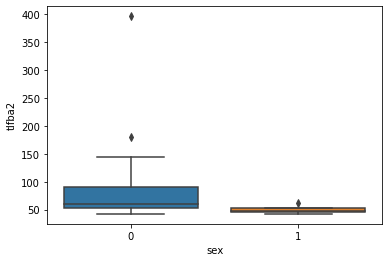

In [318]:
alco_holism = 40
alco_ok=5

data_non_zero = data[data.tlfba2 != 0]
data_alcoholism = data_non_zero[data_non_zero.tlfba2 > alco_holism]

data_less40 = data_non_zero[data_non_zero.tlfba2 <= alco_holism]
data_alco_ok = data_less40[data_less70.tlfba2 > alco_ok]

data_less5 = data_non_zero[data_non_zero.tlfba2 <= alco_ok]
print('alcoholics (>' + str(alco_holism)+' ml):')
sns.boxplot(y=data_alcoholism.tlfba2, x=data_alcoholism.sex)

normal guys (5-40 ml):


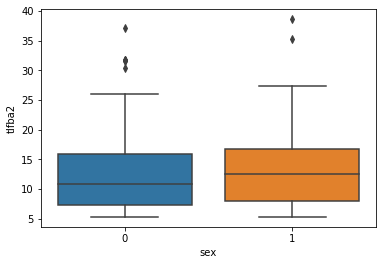

In [321]:
print('normal guys (' + str(alco_ok)+'-'+str(alco_holism)+' ml):')
sns.boxplot(y=data_alco_ok.tlfba2, x=data_alco_ok.sex)

almost sober guys (0,(0)1 -5 ml):


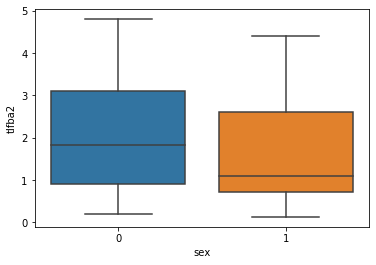

In [322]:
print('almost sober guys (0,(0)1 -'+str(alco_ok)+' ml):')
sns.boxplot(y=data_less5.tlfba2, x=data_less5.sex)

In [323]:
data_alco = data[data.tlfba2 > 0]
data_alco.groupby('sex').median()

,age,curent_working,tlfba2,tlfbh2,cravin
sex,,,,,
0,23,0,6.6,257.8,3.5
1,22,0,2.7,455.6,3.9


1) Сильнопьющих женщин мало (и пьют они меньше)

2) В категории среднепьющие побеждают женщины))

3) в категории малопьющие снова мужчины (вечерком расслабляются с баночкой пенного)

4) А в среднем мужчины пьют заметно больше, чем женщины. И квартиль больше, и медиана (среди всех медиана = 5.3 у мужчин и 1.99 у женщин, а среди пьющих 6.6 у мужчин и 2.7 у женщин (все в граммах спирта, видимо - маловато))))).


Проделаю тоже самое с героином.

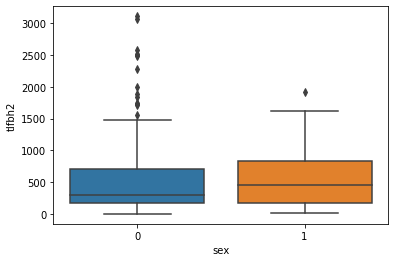

In [89]:
sns.boxplot(y=data.tlfbh2, x=data.sex)

Все хорошо, в среднем девушки больше употребляют наркотики.

Проверим, есть ли неупотребляющие:

In [79]:
data_hero = data[data.tlfbh2 == 0]
data_hero

,sex,age,curent_working,tlfba2,tlfbh2,cravin


Неа.

Построю отдельно для выбросов (пусть больше полуторатысяч - как раз граница 3го квартиля) и отдельно для меньше полуторатысяч: 

In [324]:
data_hero_max = data[data.tlfbh2 > 1500]
data_hero_ok = data[data.tlfbh2 <= 1500]

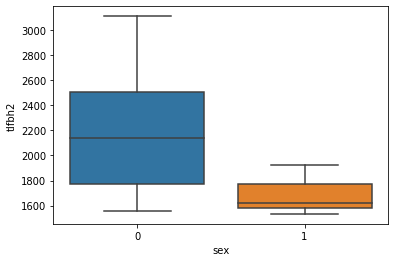

In [325]:
sns.boxplot(y=data_hero_max.tlfbh2, x=data.sex)

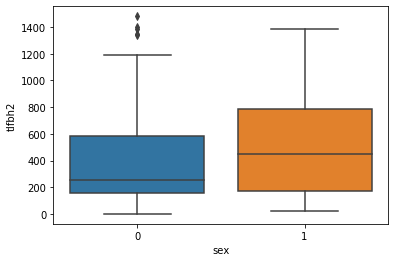

In [326]:
sns.boxplot(y=data_hero_ok.tlfbh2, x=data.sex)

Итак, среди всех употребляют в среднем: мужчины 304.25 мг героина, а девушки 455.60 мг.
Неупотребляющих в данном датасете не представлено.
Но, среди сильноупотребляющих больше парней.
Ну и на оценку необходимой дозы героина взглянем.

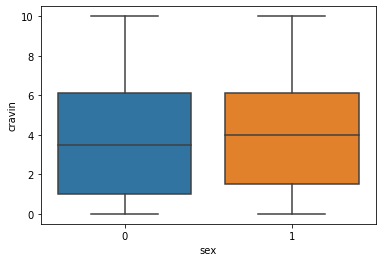

In [327]:
sns.boxplot(y=data.cravin, x=data.sex)

Не особо большая разница, у женщин чуть больше --- 4 против 3.5 (ну так как они употребляют чуть больше).

### Работают/нет

Ну и коротко пробежимся по работающим/не работающим людям

/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


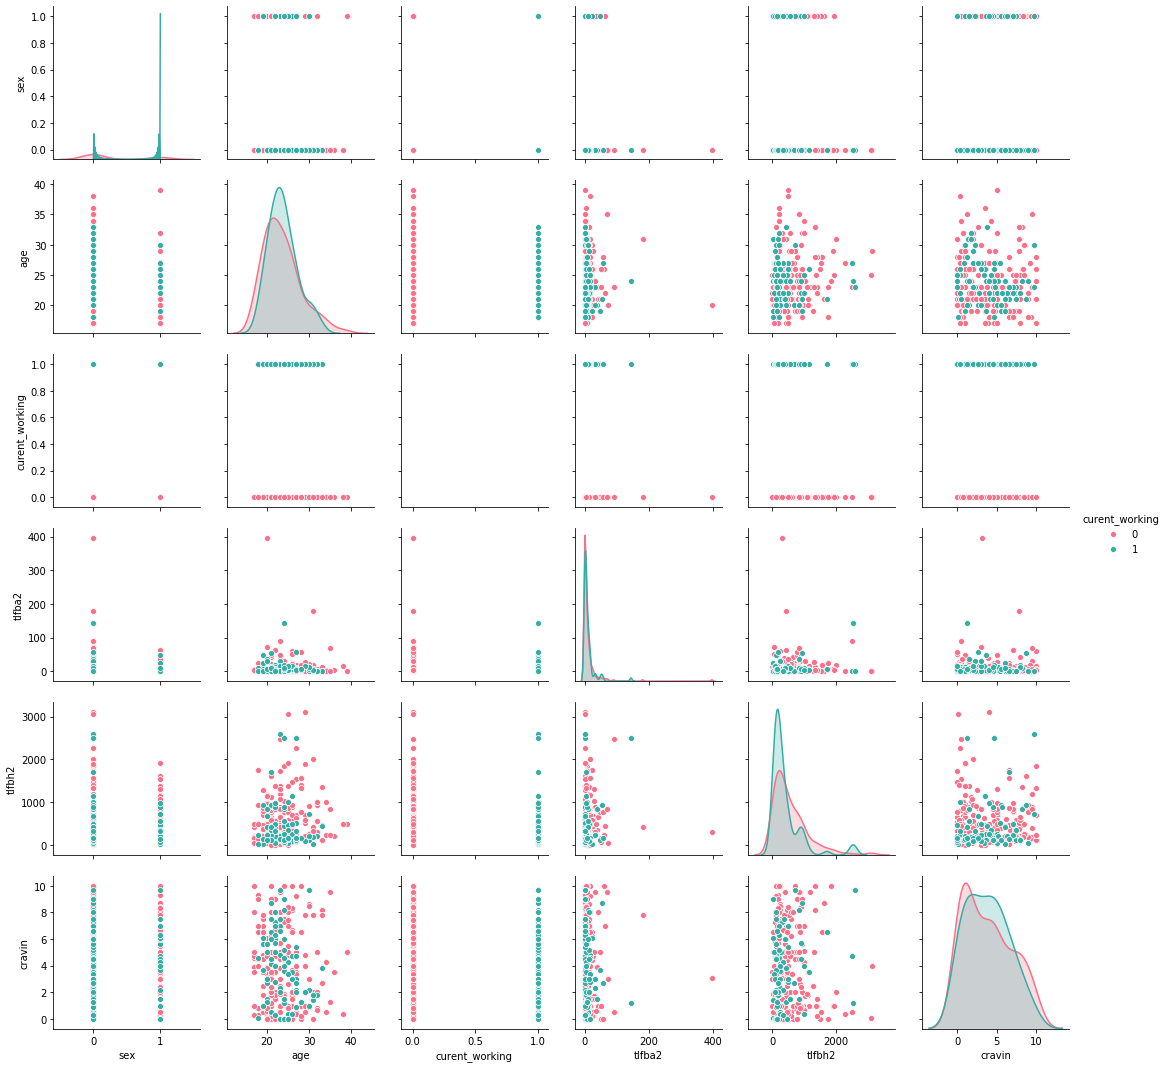

In [328]:
sns.pairplot(data, hue="curent_working", palette="husl");

In [329]:
data.groupby('curent_working').median()

,sex,age,tlfba2,tlfbh2,cravin
curent_working,,,,,
0,0.0,23.0,3.5,426.60,3.50
1,0.0,23.5,5.3,234.65,3.75


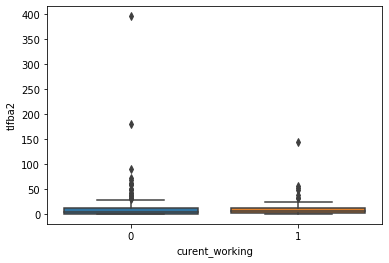

In [330]:
sns.boxplot(y=data.tlfba2, x=data.curent_working)

Лол, неработающие больше употребляют, но ЗАТО работающие больше пьют. Построим боксплоты точно так же, как делали выше:

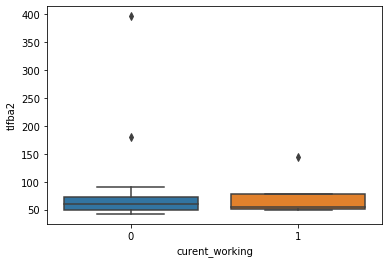

In [331]:
sns.boxplot(y=data_alcoholism.tlfba2, x=data_alcoholism.curent_working)

Все притянуты внизу, однако среди сильнопьющий в среднем разброс чуть больше в группе работающий (полоска оранжевая толще) и медиана у них выше.

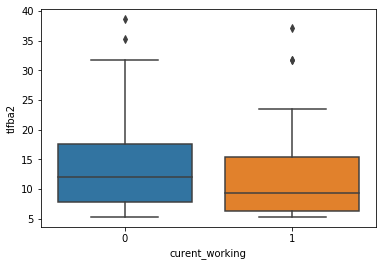

In [332]:
sns.boxplot(y=data_alco_ok.tlfba2, x=data_alco_ok.curent_working)

Из среднепьюющих пьют больше те, кто не работает.

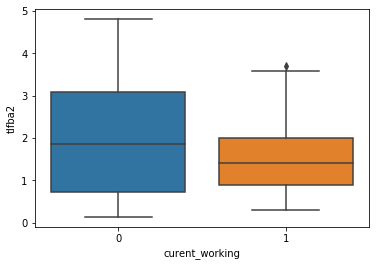

In [333]:
sns.boxplot(y=data_less5.tlfba2, x=data_less5.curent_working)

Тэперь все понятно, по группам медианы расположены примерно одинаково, однако, учитывая что если брать всех, то медиана почти на 2 мл будет больше у работающих, становится ясно, как работяги проводят свои вечера - баночка пива и спать.
Ну и героин.

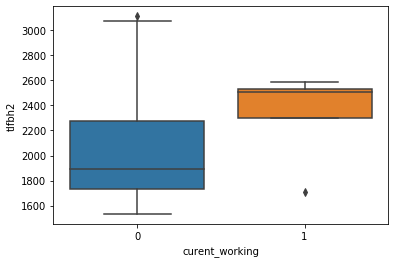

In [116]:
sns.boxplot(y=data_hero_max.tlfbh2, x=data.curent_working)

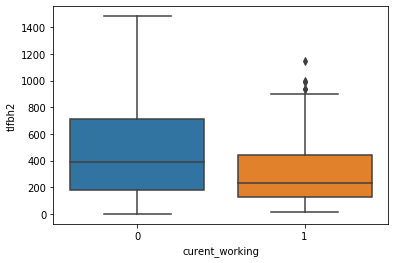

In [117]:
sns.boxplot(y=data_hero_ok.tlfbh2, x=data.curent_working)

ух! Работяги продолжают удивлять.

Хотя на дозах <1500 заметно лидируют безработные (более высокий уровень употребления), но есть несколько работяг, которые употребляют много (настолько, что медиана выше, чем у безраотных))

усе!

# Задание 2


<img src="2.png">

Все переменные понятны, theta -  наш параметр, генерируем 3 выборки размером 400б 10к и 100к; и рисуем плотность распределения (1, 3, 5) и функцию распределения(2, 4, 6).

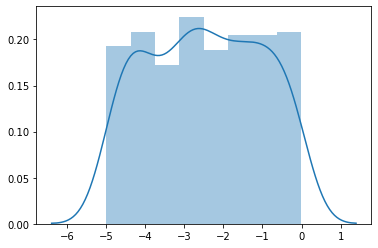

In [120]:
theta = 5
sample = np.random.uniform(low=-theta, high=0, size=400)
sns.distplot(sample)

(array([0.0375, 0.0675, 0.105 , 0.1325, 0.175 , 0.2125, 0.2425, 0.2575,
        0.2875, 0.315 , 0.35  , 0.37  , 0.425 , 0.4575, 0.4975, 0.535 ,
        0.5725, 0.595 , 0.6325, 0.66  , 0.6975, 0.725 , 0.765 , 0.8   ,
        0.8225, 0.87  , 0.895 , 0.925 , 0.95  , 1.    ]),
 array([-4.99150008, -4.82528345, -4.65906682, -4.49285019, -4.32663357,
        -4.16041694, -3.99420031, -3.82798368, -3.66176705, -3.49555043,
        -3.3293338 , -3.16311717, -2.99690054, -2.83068392, -2.66446729,
        -2.49825066, -2.33203403, -2.1658174 , -1.99960078, -1.83338415,
        -1.66716752, -1.50095089, -1.33473427, -1.16851764, -1.00230101,
        -0.83608438, -0.66986775, -0.50365113, -0.3374345 , -0.17121787,
        -0.00500124]),
 <a list of 30 Patch objects>)

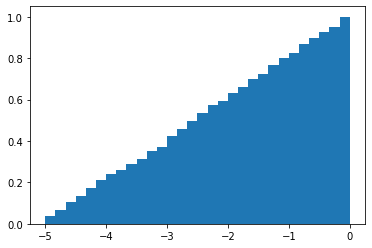

In [121]:
plt.hist(sample,cumulative=True, density=True, bins=30)

ну такооое, есть заскоки. Попробую то же самое на 10000 и 100000.

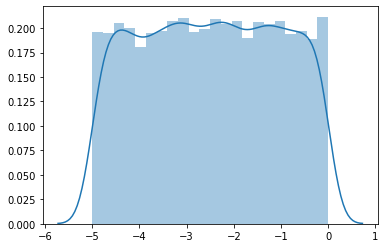

In [122]:
sample_2 = np.random.uniform(low=-theta, high=0, size=10000)
sns.distplot(sample_2)

(array([0.0336, 0.0648, 0.0984, 0.1327, 0.1659, 0.1974, 0.2266, 0.2601,
        0.2937, 0.327 , 0.3614, 0.3963, 0.4297, 0.4621, 0.4957, 0.5306,
        0.5668, 0.6004, 0.6329, 0.6654, 0.6977, 0.733 , 0.7672, 0.8   ,
        0.8326, 0.8666, 0.9001, 0.9312, 0.9638, 1.    ]),
 array([-4.99992453e+00, -4.83326934e+00, -4.66661414e+00, -4.49995895e+00,
        -4.33330375e+00, -4.16664855e+00, -3.99999336e+00, -3.83333816e+00,
        -3.66668297e+00, -3.50002777e+00, -3.33337258e+00, -3.16671738e+00,
        -3.00006219e+00, -2.83340699e+00, -2.66675180e+00, -2.50009660e+00,
        -2.33344141e+00, -2.16678621e+00, -2.00013102e+00, -1.83347582e+00,
        -1.66682062e+00, -1.50016543e+00, -1.33351023e+00, -1.16685504e+00,
        -1.00019984e+00, -8.33544648e-01, -6.66889452e-01, -5.00234257e-01,
        -3.33579062e-01, -1.66923866e-01, -2.68670870e-04]),
 <a list of 30 Patch objects>)

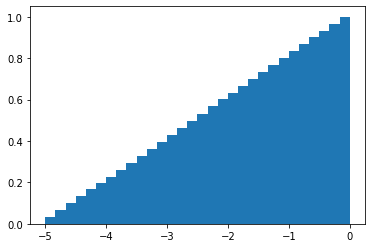

In [123]:
plt.hist(sample_2,cumulative=True, density=True, bins=30)

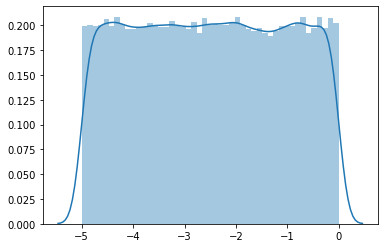

In [124]:
sample_3 = np.random.uniform(low=-theta, high=0, size=100000)
sns.distplot(sample_3)

(array([0.03365, 0.06667, 0.10049, 0.13472, 0.16814, 0.2011 , 0.23398,
        0.26688, 0.30077, 0.33392, 0.36778, 0.4008 , 0.43369, 0.46679,
        0.50038, 0.53449, 0.5671 , 0.60156, 0.63562, 0.66795, 0.701  ,
        0.73278, 0.76524, 0.79812, 0.83189, 0.8664 , 0.89889, 0.93247,
        0.96608, 1.     ]),
 array([-4.99997460e+00, -4.83331553e+00, -4.66665647e+00, -4.49999740e+00,
        -4.33333833e+00, -4.16667926e+00, -4.00002019e+00, -3.83336112e+00,
        -3.66670205e+00, -3.50004299e+00, -3.33338392e+00, -3.16672485e+00,
        -3.00006578e+00, -2.83340671e+00, -2.66674764e+00, -2.50008857e+00,
        -2.33342951e+00, -2.16677044e+00, -2.00011137e+00, -1.83345230e+00,
        -1.66679323e+00, -1.50013416e+00, -1.33347509e+00, -1.16681603e+00,
        -1.00015696e+00, -8.33497888e-01, -6.66838820e-01, -5.00179751e-01,
        -3.33520683e-01, -1.66861614e-01, -2.02545633e-04]),
 <a list of 30 Patch objects>)

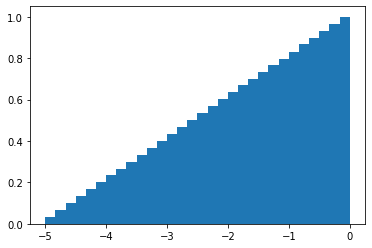

In [125]:
plt.hist(sample_3,cumulative=True, density=True, bins=30)

Defenetly, намного равномернее равномерное распределение)).

### 2a. Сходимости

Нужно продемонстрировать сходимость оценки параметра к истинному значению. Сделаем же это!
theta_hats - оценки этого параметра

In [126]:
def draw_convergence(x, y, title, theta):
    x = np.array(x)
    y = np.array(y)
    
    data = np.column_stack((x, y))

    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )
    plt.plot([0, max(x)],[theta,  theta], linestyle="-", color = 'lime')
#     ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.set_title(title)

    plt.show()

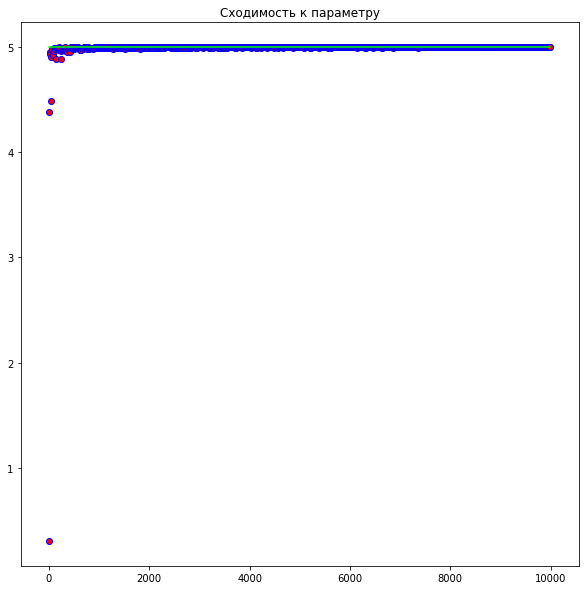

In [159]:
theta_hats = []
diff = []
# Точек будет max_n*5+1
max_n = 1000
theta_hats.append(min(np.random.uniform(low=-theta, high=0, size=1))*-1)
for i in range (1, max_n):
    theta_hats.append(min(np.random.uniform(low=-theta, high=0, size=i*10+1))*-1)
    diff.append(abs(theta_hats[i-1]-theta_hats[i-2]))
draw_convergence([i for i in range (1, max_n*10+1, 10)], theta_hats, 'Сходимость к параметру', theta)

Сходится (вроде даже оценка несмещенная), теперь посмотрим на скорость сходимости.
Для этого я кроме самих значений вычислял разницу между соседними элементами (массив diff). Он стремится к нулю, если сходится (сейчас мы это увидим), и скорость можно посмотреть асимптотически. Сделаем это!

In [160]:
def draw_speed(x, y, title, theta):
    x = np.array(x)
    y = np.array(y)
    
    data = np.column_stack((x, y))

    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )
#     plt.plot([0, max(x)],[theta,  theta], linestyle="-", color = 'lime')
#     ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.set_title(title)

    plt.show()

Красный - разница между соседними эементами функции, 

Синяя пунктирная линия - 1/sqrt(n)

Пунктирная линия цвета индиго (фиолетовенькая) - 1/n

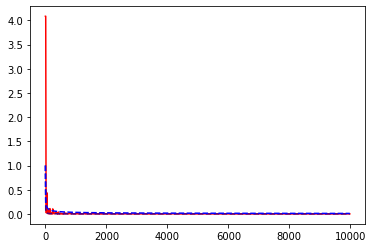

In [190]:
plt.plot([i for i in range (1, max_n*10-9, 10)], diff, linestyle="-", color = 'red')
plt.plot([i for i in range (1, max_n*10-9, 10)], [1/i for i in range (1, max_n*10-9, 10)], linestyle="--", color = 'indigo')
plt.plot([i for i in range (1, max_n*10-9, 10)], [1/sqrt(i) for i in range (1, max_n*10-9, 10)], linestyle="--", color = 'blue')

Уберу мешающее начало:

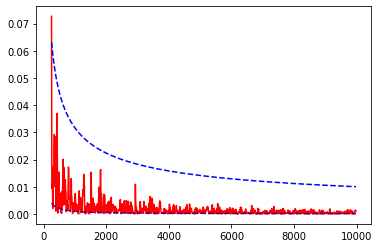

In [194]:
plt.plot([i for i in range (251, max_n*10-9, 10)], diff[25:], linestyle="-", color = 'red')
plt.plot([i for i in range (251, max_n*10-9, 10)], [1/i for i in range (251, max_n*10-9, 10)], linestyle="--", color = 'indigo')
plt.plot([i for i in range (251, max_n*10-9, 10)], [1/sqrt(i) for i in range (251, max_n*10-9, 10)], linestyle="--", color = 'blue')

Видно, что асимптотически скорость сходимости пропорциональна $\frac{1}{n}$. КРУТО.

### 2б - с неравенством Рио-Крамера (=> мягкий дедлайн 11го, сделаю на выходных!) 

# Задание 3

<img src="3.png">
И пояснения:
<img src="3_2.png">

### Это задание тоже сказали на паре, что мягкий дедайн = жесткий дедлайн, т.е. можно получить фидбек и переделать, сдав после мягкого (но до жесткого). Чудесно!

# Задание 4
<img src="4.png">
Показать, что $D_n$ имеет предеельное распределение*

Первое, что сделаем - функцию для подсчета эмпирической функции распределения.

ЧТо хранят словари:

* amount[i] - количество элемента = i.
* amount_less[i] - количество элемента < i.

Считается все очевидно, просто сначала считаем количество каждого элемента (amount) , а потом пробегаемся еще раз, и смотрим количество меньших элементов, чем i-й => получаем числитель и чтобы получить саму функцию распределения, делим на знаменатель - получаем f:
* f - эмпирической функции распределения

p.s. в тот раз у меня функция распределения считалась неправильно, и поэтому были проблемы с возрастанием этой фигни.  Сейчас все исправил.

In [301]:
def f_n(sample):
    amount = {}
    sample.sort()
    for i in sample:
        if i in amount:
            amount[i] += 1
        else:
            amount.update({i:1})
    return from_density_to_distribution(amount, len(sample))

In [302]:
def from_density_to_distribution (amount, n):
    prev_key = ''
    cur_key = ''
    amount_less = {}
    for cur_key in amount:
        if prev_key != '':
            amount_less.update({cur_key:amount[prev_key]+amount_less[prev_key]})
        else:
            amount_less.update({cur_key:0})
        prev_key = cur_key
    amount_less.update({cur_key:n})
    f = {}
    for i in amount_less:
        f.update({i: amount_less[i]/n})
    return f

Напишем функции для вычисления значений Функции распределения в точке x для двух распределений: равномерного и нормального.

In [303]:
def f_uniform(x, a=0, b=1):
    if x < a: return 0
    if x >= b: return 1
    else: return (x-a)/(b-a)

def f_normal(x, mu = 0, sigma = 1):
    return scipy.stats.norm.cdf((x - mu)/sigma)

Ну и функция для подсчета этого критерия (Колмогорова-Смирнова) (на вход принимает сэмпл и тип сэмпла и параметры типа сэмпла)

1. Сначала бежит по всем значения эмпирической функцции распределения (посчитанной с помощью функции f_n)
2. Считает разницу между значением эмпирической функции распределения f_n_empirical[x] и теоретическим значением f_real (оно зависит от типа распределения, поэтому иф).
3. В супремум всегда будет записана максимальная разница к данному шагу.

Ну и возвращаем разницу, умноженную на $\sqrt{n}$ ($n$ - количество элементов в выборке).

In [304]:
def d_n(sample, dist_type = 'uniform', parameter_a = 0, parameter_b = 1):
    sup = -1
    f_n_empirical = f_n(sample)
    for x in f_n_empirical:
        f_real = 0
        if dist_type == 'uniform':
            f_real = f_uniform(x, parameter_a, parameter_b)
        if dist_type == 'normal':
            f_real = f_normal(x, parameter_a, parameter_b)
        difference = abs(f_real - f_n_empirical[x])
        if difference > sup:
            sup = difference
    return sup*(sqrt(len(sample)))

Тэперь посчитаем статистику критерия Колмогорова-Смирнова. Сначала для равномерного распределения (max_n - сколько итераций я сделаю, а максимаьный size выборки это max_n* на множитель в задании size, в данном случае множитель равен 100 и макс_колво = 100*1000 = 100000). (Так же буду считать скорость сходимости, для этого (как и во втором задании)).

200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18500 18

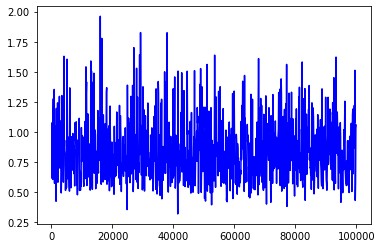

In [307]:
# a, b - параметры в равномерном распределении.
a = 0
b = 100
d_n_uniform = []
d_n_uniform_diff = []
max_n = 1000
d_n_uniform.append(d_n(np.random.uniform(low=a, high=b, size=100), 'uniform', a, b))
for i in range (2, max_n):
    print(i*100, end = ' ')
    d_n_uniform.append(d_n(np.random.uniform(low=a, high=b, size=i*100), 'uniform', a, b))
    d_n_uniform_diff.append(abs(d_n_uniform[i-2]-d_n_uniform[i-1]))
plt.plot([i*100 for i in range (1, max_n)], d_n_uniform, linestyle="-", color = 'blue')

Странная фигня, оно как-будто скачит относительно одного числа (0.75). ИНТЭРЭСНО

ValueError: x and y must have same first dimension, but have shapes (48,) and (998,)

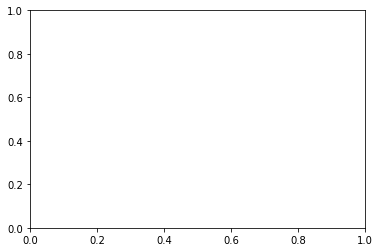

In [310]:
plt.plot([i*20 for i in range (1, max_n-1)], d_n_uniform_diff, linestyle="-", color = 'blue')

##### Теперь посмотрим на нормальном.

200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18500 18

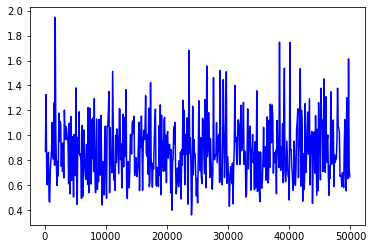

In [312]:
# a, b - параметры в равномерном распределении.
mu = 2
sigma = 100
d_n_normal = []
d_n_normal_diff = []
max_n = 500
d_n_normal.append(d_n(np.random.normal(loc = mu, scale=sigma, size = 100), 'normal', mu, sigma))
for i in range (2, max_n):
    print(i*100, end = ' ')
    d_n_normal.append(d_n(np.random.normal(loc = mu, scale=sigma, size=i*100), 'normal', mu, sigma))
    d_n_normal_diff.append(abs(d_n_normal[i-1]-d_n_normal[i-2]))
plt.plot([i*100 for i in range (1, max_n)], d_n_normal, linestyle="-", color = 'blue')

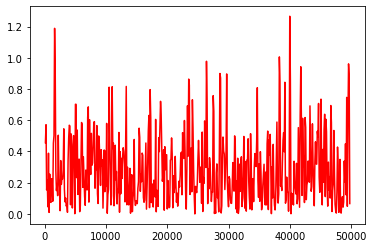

In [313]:
plt.plot([i*100 for i in range (1, max_n-1)], d_n_normal_diff, linestyle="-", color = 'red')

Тут тоже вертится вокруг 0.85. Что же делать?

#### ШАГ 2
Не понятно что происходит. По совету Влада построю эмпирическую функцию распределения.

In [220]:
def draw_dict(d):
    lists = sorted(d.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.show()

In [230]:
# a, b - параметры в равномерном распределении.
mu = 2
sigma = 100
pack_of_d_n = []
max_n = 100
for i in range (max_n):
    a = np.random.normal(loc = mu, scale=sigma, size=10)
    print(d_n(a, 'normal', mu, sigma))
draw_dict(f_n(pack_of_d_n))
    
    

2.3481702572741123
3.0210410708453086
1.927348779357384
3.0462189262505044
3.0568207922539354
2.768747975840985
2.7632269880275264
3.071599040621747
2.8447700604767676
3.087130625606127
2.9602195355818384
2.9973015171716924
2.8669210494382606
3.073967756546205
3.0382203598007553
2.4931002454731366
2.531527317854512
2.9084591494276903
2.7030923995881273
2.109754209327516
2.841723742505401
3.0512956547845187
3.041898615724771
2.1080373953109675
2.7738089228765817
3.065815431243204
2.8875276104345953
2.903333818992986
2.7958730556217257
2.8371952781977257
2.9711253483257964
3.0748542051493803
2.9459271742602104
3.061553121632853
1.9786078320188751
2.916373788528637
2.8530115405284997
2.9030199723041523
3.06078485506764
2.9870242138753875
3.0664788558325995
2.6391562397327535
2.8392407890891818
3.0005631640511266
2.720659748145744
3.026669585375614
2.670315932982995
2.4283296094113354
2.8346486959215786
3.0243085531583267
2.846411829391696
2.679724425838605
2.961910030365063
2.099533967339

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
d_n(np.random.normal(loc = mu, scale=sigma, size=i*100), 'normal', mu, sigma)